# K nearest neighbour

In [23]:
#Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Reading files
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df.shape
#removing outliers
df=df[df["trip_duration"]<6000]
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df.drop(["id","pickup_datetime","dropoff_datetime", "store_and_fwd_flag"],axis=1,inplace=True)

In [7]:
df.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
dtype: object

In [17]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848


In [11]:
#seperating independent and dependent variables
x = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((724984, 6), (724984,))

In [12]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
x = pd.DataFrame(x_scaled)

In [14]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 52)

In [30]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [8]:
# Creating instance of KNN
reg = KNN(n_neighbors = 45)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     130171.16534178023


In [ ]:
#Defining K range
k = range(25,56)

In [ ]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

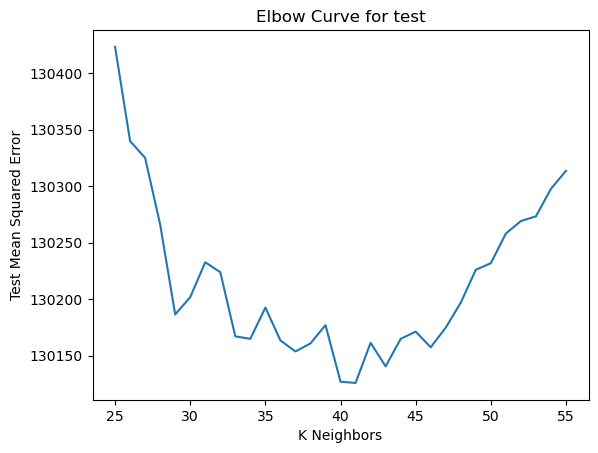

In [27]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [32]:
# Creating instance of KNN
reg = KNN(n_neighbors = 41)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     130125.76779783357


In [33]:
k = mae(test_predict, test_y)
print('Test MAE    ', k )

Test MAE     235.4292275718515


In [21]:
# Creating instance of KNN
reg = KNN(n_neighbors = 41)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = reg.predict(train_x)
k = mse(train_predict, train_y)
print('Train MSE    ', k )

Train MSE     123573.0819688122


In [31]:
k = mae(train_predict, train_y)
print('Train MAE    ', k )

Train MAE     228.93482320977935
